In [1]:
# Cell 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading

In [73]:
# Cell 2: Loading the CSV Files into DataFrames
# Specify the path to your CSV files
file_path = r"C:\Users\Coditas-Admin\Documents\GitHub\Pandas-Assignment\data"

# Load all CSV files into DataFrames using raw strings
ev_main_df = pd.read_csv(rf"{file_path}\ev_main.csv")
ev_efficiency_df = pd.read_csv(rf"{file_path}\ev_efficiency.csv")
ev_manufacturing_df = pd.read_csv(rf"{file_path}\ev_manufacturing.csv")
ev_market_share_df = pd.read_csv(rf"{file_path}\ev_market_share.csv")

# Print the DataFrames to verify successful loading
print("EV Main DataFrame:")
print(ev_main_df.head(), "\n")

print("EV Efficiency DataFrame:")
print(ev_efficiency_df.head(), "\n")

print("EV Manufacturing DataFrame:")
print(ev_manufacturing_df.head(), "\n")

print("EV Market Share DataFrame:")
print(ev_market_share_df.head(), "\n")


EV Main DataFrame:
      Brand            Model  Range         Price  Battery_Capacity  \
0   Hyundai  F-150 Lightning  269.0  42255.781571         71.933908   
1       BMW              Air  280.0  48325.744692         57.563723   
2  Polestar             Leaf  170.0  75760.942014         77.289710   
3     Volvo           Mach-E    NaN  51079.952545         67.389763   
4    Rivian              NaN  328.0  28326.088425         68.895442   

   Charging_Speed  Acceleration   Top_Speed  Seating_Capacity Launch_Date  \
0      224.349743      6.933665  132.367829               7.0  2020-09-01   
1      149.416424      6.142154   94.713792               5.0  2018-06-30   
2      116.021236      5.928050  147.081831               NaN  2019-07-30   
3      166.969427      3.427392  126.764127               5.0  2017-03-08   
4      214.476618      6.399660   66.281716               4.0  2016-12-15   

         Date  Sales  
0  2020-09-01   35.0  
1  2018-06-30   27.0  
2         NaN   32.0  

## Series Operations

In [63]:
# Create a Pandas Series containing EV brands
brands = pd.Series(['Tesla', 'Nissan', 'Chevrolet', 'BMW', 'Ford'])

# Perform basic operations like indexing and string methods
print("Brand at index 1:", brands.loc[1])
print("Brand at index -1 :", brands.iloc[-1])
print("Uppercase brands:\n", brands.str.upper())

long_brands = brands[brands.str.len() > 5]
print("\nBrands with more than 5 characters:")
print(long_brands)

# Brands and its length


# Calculate and display the mean length of the brand names
mean_length = brands.str.len().mean()
print(f"\nMean length of brand names: {mean_length:.2f}")

Brand at index 1: Nissan
Brand at index -1 : Ford
Uppercase brands:
 0        TESLA
1       NISSAN
2    CHEVROLET
3          BMW
4         FORD
dtype: object

Brands with more than 5 characters:
1       Nissan
2    Chevrolet
dtype: object

Mean length of brand names: 5.40


In [64]:
brands

0        Tesla
1       Nissan
2    Chevrolet
3          BMW
4         Ford
dtype: object

In [65]:
import pandas as pd
import numpy as np

# Sample DataFrame (replace with your actual DataFrame)
df = pd.DataFrame({
    'Brand': ['Tesla', 'Nissan', 'Chevrolet', 'BMW', 'Ford', 'BMW', 'Nissan', 'Ford'],
    'Sales': [100, 200, 300, 400, 500, 600, 700, 800],
})

# Create a copy of the DataFrame if you want to avoid modifying the original DataFrame
df_copy = df.copy()

# Create a new column 'Sales_with_zeros' and insert random zeros
num_zeros = int(len(df_copy) * 0.5)  # Let's introduce zeros in 50% of the rows

# Randomly select indices where zeros will be inserted
random_indices = np.random.choice(df_copy.index, size=num_zeros, replace=False)

# Assign zero values to the selected rows in the 'Sales_with_zeros' column
df_copy['Sales_with_zeros'] = df_copy['Sales']  # Copy original 'Sales' column
df_copy.loc[random_indices, 'Sales_with_zeros'] = 0  # Set zeros in selected rows

# Print the DataFrame to check if the 'Sales_with_zeros' column has zeros
print("Before Cleaning:")
print(df_copy[['Sales', 'Sales_with_zeros']].head(20))  # Print first 20 rows as an example

# Function to replace zeros in numerical columns with the median of non-zero values
def clean_dataframe(df):
    """
    Clean the DataFrame by replacing zeros in numerical columns with the median of non-zero values.
    
    Args:
    df (DataFrame): DataFrame to clean.
    
    Returns:
    DataFrame: Cleaned DataFrame.
    """
    print(f"Processing DataFrame...")

    # Replace zeros in numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        if (df[col] == 0).sum() > 0:  # Check if zeros are present
            median_value = df[col][df[col] != 0].median()  # Median excluding zeros
            df.loc[:, col] = df[col].replace(0, median_value)  # Replace zeros with median
            print(f"Zeros in column '{col}' were replaced with median value: {median_value}")
    
    return df

# Call the cleaning function to replace zeros
df_copy_cleaned = clean_dataframe(df_copy)

# Print the cleaned DataFrame to verify zeros were replaced
print("\nAfter Cleaning:")
print(df_copy_cleaned[['Sales', 'Sales_with_zeros']].head(20))  # Print first 20 rows as an example


Before Cleaning:
   Sales  Sales_with_zeros
0    100                 0
1    200                 0
2    300                 0
3    400               400
4    500                 0
5    600               600
6    700               700
7    800               800
Processing DataFrame...
Zeros in column 'Sales_with_zeros' were replaced with median value: 650.0

After Cleaning:
   Sales  Sales_with_zeros
0    100               650
1    200               650
2    300               650
3    400               400
4    500               650
5    600               600
6    700               700
7    800               800


In [74]:
def clean_dataframe(df, output_file_path):
    """
    Clean the given DataFrame by handling missing values, duplicates, zeros, outliers, and categorical variables.
    The cleaned DataFrame is then saved to the specified file path.

    Parameters:
    df (DataFrame): The DataFrame to clean.
    output_file_path (str): The file path to save the cleaned data.
    
    Returns:
    DataFrame: The cleaned DataFrame.
    """
    print(f"Processing DataFrame...")
    print("Number of rows before cleaning:", df.shape[0])
    
    # 1. Handle duplicates
    df = df.drop_duplicates(keep='first')
    
    # 2. Handle missing values
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Numerical columns
            median_value = df[column].median()
            df.loc[:, column] = df[column].fillna(median_value)  # Replace NaN with median
        else:  # Categorical columns (strings)
            if df[column].dtype == 'object':  # Check if the column is of type object (string)
                df.loc[:, column] = df[column].str.strip()  # Remove leading/trailing spaces
            mode_value = df[column].mode(dropna=True)[0] if not df[column].mode(dropna=True).empty else "No Data"
            df.loc[:, column] = df[column].fillna(mode_value).replace('', mode_value)  # Replace NaN and empty strings
    
    # 3. Replace zeros in numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        if (df[col] == 0).sum() > 0:  # Check if zeros are present
            median_value = df[col][df[col] != 0].median()  # Median excluding zeros
            df.loc[:, col] = df[col].replace(0, median_value)  # Replace zeros with median
    
    # 4. Convert date columns to datetime format
    date_columns = ['Date', 'Launch_Date']  # Adjust the date columns based on your dataset
    for column in date_columns:
        if column in df.columns:
            df.loc[:, column] = pd.to_datetime(df[column], errors='coerce')
    
    # Print the number of rows after cleaning
    print("Number of rows after cleaning:", df.shape[0])
    
    # Save the cleaned data
    df.to_csv(output_file_path, index=False)
    print(f"Cleaned data saved to: {output_file_path}")
    
    return df

# Example usage: Cleaning each DataFrame and saving the result
output_path = r"C:\Users\Coditas-Admin\Documents\GitHub\Pandas-Assignment\data\cleaned_data"

# Cleaning and updating the DataFrames in place
ev_main_df = clean_dataframe(ev_main_df, rf"{output_path}\ev_main_cleaned.csv")
ev_efficiency_df = clean_dataframe(ev_efficiency_df, rf"{output_path}\ev_efficiency_cleaned.csv")
ev_manufacturing_df = clean_dataframe(ev_manufacturing_df, rf"{output_path}\ev_manufacturing_cleaned.csv")
ev_market_share_df = clean_dataframe(ev_market_share_df, rf"{output_path}\ev_market_share_cleaned.csv")


Processing DataFrame...
Number of rows before cleaning: 10500
Number of rows after cleaning: 10000
Cleaned data saved to: C:\Users\Coditas-Admin\Documents\GitHub\Pandas-Assignment\data\cleaned_data\ev_main_cleaned.csv
Processing DataFrame...
Number of rows before cleaning: 25
Number of rows after cleaning: 25
Cleaned data saved to: C:\Users\Coditas-Admin\Documents\GitHub\Pandas-Assignment\data\cleaned_data\ev_efficiency_cleaned.csv
Processing DataFrame...
Number of rows before cleaning: 15
Number of rows after cleaning: 15
Cleaned data saved to: C:\Users\Coditas-Admin\Documents\GitHub\Pandas-Assignment\data\cleaned_data\ev_manufacturing_cleaned.csv
Processing DataFrame...
Number of rows before cleaning: 135
Number of rows after cleaning: 135
Cleaned data saved to: C:\Users\Coditas-Admin\Documents\GitHub\Pandas-Assignment\data\cleaned_data\ev_market_share_cleaned.csv


## Working with DataFrames

In [75]:
# 1. Display basic info of the cleaned DataFrame
print("\nEV Main DataFrame Information:")
print(ev_main_df.info())

# 2. Display DataFrame axes
print("\nEV Main DataFrame Axes:")
print(ev_main_df.axes)

# 3. Accessing specific values (e.g., 'Tesla' brand and 'Model' column)
tesla_models_df = ev_main_df[ev_main_df['Brand'] == 'Tesla']['Model']
print("\nTesla Models:")
print(tesla_models_df)

# 4. Filter EVs with Range over 250 miles
evs_over_250_miles_df = ev_main_df[ev_main_df['Range'] > 250]
print("\nEVs with Range over 250 miles:")
print(evs_over_250_miles_df)

# 5. Calculate average price of EVs
average_price = ev_main_df['Price'].mean()
print(f"\nAverage Price of EVs: {average_price}")



EV Main DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             10000 non-null  object 
 1   Model             10000 non-null  object 
 2   Range             10000 non-null  float64
 3   Price             10000 non-null  float64
 4   Battery_Capacity  10000 non-null  float64
 5   Charging_Speed    10000 non-null  float64
 6   Acceleration      10000 non-null  float64
 7   Top_Speed         10000 non-null  float64
 8   Seating_Capacity  10000 non-null  float64
 9   Launch_Date       10000 non-null  object 
 10  Date              10000 non-null  object 
 11  Sales             10000 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1015.6+ KB
None

EV Main DataFrame Axes:
[Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 

## Advance Dataframe Operations

In [76]:
# b) Merge
# Merge the main EV DataFrame with the efficiency DataFrame based on the 'Model' column.
ev_merged_df = pd.merge(ev_main_df, ev_efficiency_df, on="Model", how="inner")

# Perform a left join to merge the resulting DataFrame with the manufacturing DataFrame based on the 'Brand' column.
ev_final_df = pd.merge(ev_merged_df, ev_manufacturing_df, on="Brand", how="left")

print("\nMerged DataFrame (ev_final):")
print(ev_final_df.head())

# Verify missing values in Efficiency
print("\nMissing values in Efficiency after merging:")
print(ev_final_df[["Efficiency"]].isna().sum())

# Fill missing Efficiency values if any exist
ev_final_df["Efficiency"] = ev_final_df["Efficiency"].fillna(ev_final_df["Efficiency"].median())

# c) Concatenation
# Split the main DataFrame into two based on a condition (e.g., Price > 50000).
ev_high_price_df = ev_main_df[ev_main_df["Price"] > 50000]
ev_low_price_df = ev_main_df[ev_main_df["Price"] <= 50000]

# Concatenate these DataFrames back together.
ev_concat_df = pd.concat([ev_high_price_df, ev_low_price_df])

# Verify the result matches the original DataFrame (i.e., the total number of rows should remain the same).
print("\nConcatenated DataFrame:")
print(ev_concat_df.shape)
print("Does concatenated DataFrame match the original? ", ev_concat_df.shape[0] == ev_main_df.shape[0])

# d) Apply
# Calculate the median of the Efficiency column
median_efficiency = ev_final_df["Efficiency"].median()
print(f"Median efficiency: {median_efficiency}")

# Create a new column 'Efficiency_Score' that categorizes each vehicle as 'High' or 'Low' efficiency based on the median.
ev_final_df["Efficiency_Score"] = ev_final_df["Efficiency"].apply(
    lambda x: "High" if x >= median_efficiency else "Low"
)

# Apply a custom function to calculate a 'Value_Score' as (Range * Efficiency) / Price.
def calculate_value_score(row):
    return (row["Range"] * row["Efficiency"]) / row["Price"]

ev_final_df["Value_Score"] = ev_final_df.apply(calculate_value_score, axis=1)

print("\nDataFrame with Efficiency_Score based on mean Efficiency and Value_Score:")
print(ev_final_df[["Model", "Efficiency_Score", "Value_Score"]].head())

# e) Reshape
# Create a pivot table showing average price by Brand and Efficiency_Score.
pivot_table_df = ev_final_df.pivot_table(values="Price", index="Brand", columns="Efficiency_Score", aggfunc="mean")

print("\nUpdated Pivot Table (Average Price by Brand and Efficiency_Score):")
print(pivot_table_df)

# Melt the DataFrame to create a "long" format for Range, Price, and Sales.
ev_melted_df = pd.melt(ev_final_df, id_vars=["Model", "Brand"], value_vars=["Range", "Price", "Sales"])

print("\nMelted DataFrame (long format for Range, Price, and Sales):")
print(ev_melted_df.head())



Merged DataFrame (ev_final):
      Brand            Model  Range         Price  Battery_Capacity  \
0   Hyundai  F-150 Lightning  269.0  42255.781571         71.933908   
1       BMW              Air  280.0  48325.744692         57.563723   
2  Polestar             Leaf  170.0  75760.942014         77.289710   
3     Volvo           Mach-E  299.0  51079.952545         67.389763   
4    Rivian              EV6  328.0  28326.088425         68.895442   

   Charging_Speed  Acceleration   Top_Speed  Seating_Capacity  \
0      224.349743      6.933665  132.367829               7.0   
1      149.416424      6.142154   94.713792               5.0   
2      116.021236      5.928050  147.081831               5.0   
3      166.969427      3.427392  126.764127               5.0   
4      214.476618      6.399660   66.281716               4.0   

           Launch_Date                 Date  Sales  Efficiency  \
0  2020-09-01 00:00:00  2020-09-01 00:00:00   35.0    0.372371   
1  2018-06-30 00:00:

## Working with Vectors

In [77]:
# Assuming ev_main_df DataFrame is already loaded and cleaned
# Ensure 'Range' and 'Price' columns are numeric
ev_main_df["Range"] = pd.to_numeric(ev_main_df["Range"], errors="coerce")
ev_main_df["Price"] = pd.to_numeric(ev_main_df["Price"], errors="coerce")

# **a) Extract 'Range' and 'Price' columns as NumPy arrays**
range_vector = ev_main_df["Range"].to_numpy()
price_vector = ev_main_df["Price"].to_numpy()

print("Range Vector:", range_vector)
print("Price Vector:", price_vector)

# **b) Calculate the correlation coefficient between Range and Price**
correlation = np.corrcoef(range_vector, price_vector)[0, 1]  # Correlation coefficient
print("Correlation Coefficient between Range and Price:", correlation)

# **c) Perform element-wise operations**
# Example: Calculate Price per Mile of Range
price_per_mile = price_vector / range_vector  # Element-wise division

# Handling division by zero or NaN (replace with np.nan for consistency)
price_per_mile = np.where(range_vector > 0, price_per_mile, np.nan)

print("Price per Mile of Range:", price_per_mile)

# Add the result back to the DataFrame
ev_main_df["Price_Per_Mile"] = price_per_mile

print("\nUpdated EV Main DataFrame with Price Per Mile:")
print(ev_main_df[["Model", "Range", "Price", "Price_Per_Mile"]].head())


Range Vector: [269. 280. 170. ... 282. 319. 310.]
Price Vector: [42255.78157084 48325.74469246 75760.94201355 ... 30990.4274146
 69684.91619629 52930.4105053 ]
Correlation Coefficient between Range and Price: 0.2367221572568663
Price per Mile of Range: [157.08468985 172.59194533 445.65260008 ... 109.89513268 218.44801315
 170.74325969]

Updated EV Main DataFrame with Price Per Mile:
             Model  Range         Price  Price_Per_Mile
0  F-150 Lightning  269.0  42255.781571      157.084690
1              Air  280.0  48325.744692      172.591945
2             Leaf  170.0  75760.942014      445.652600
3           Mach-E  299.0  51079.952545      170.835962
4              EV6  328.0  28326.088425       86.360026


## Exploratory Data Analysis (EDA) with Pandas


Descriptive Statistics for EV Final DataFrame:
              Range          Price  Battery_Capacity  Charging_Speed  \
count  10000.000000   10000.000000      10000.000000    10000.000000   
mean     299.435100   60113.862880         75.070766      150.433823   
std       48.412205   20361.877951         14.550096       48.877420   
min      129.000000  -31852.917299         15.576306      -42.096288   
25%      268.000000   46921.656933         65.754734      118.369061   
50%      299.000000   60155.719051         74.994760      150.383579   
75%      331.000000   73349.159054         84.177356      182.478703   
max      507.000000  135964.066669        136.491755      323.761969   

       Acceleration     Top_Speed  Seating_Capacity         Sales  \
count  10000.000000  10000.000000      10000.000000  10000.000000   
mean       4.985019    129.971106          4.903400     89.792900   
std        1.062359     28.513940          0.951714     45.062331   
min        0.866325      8.3

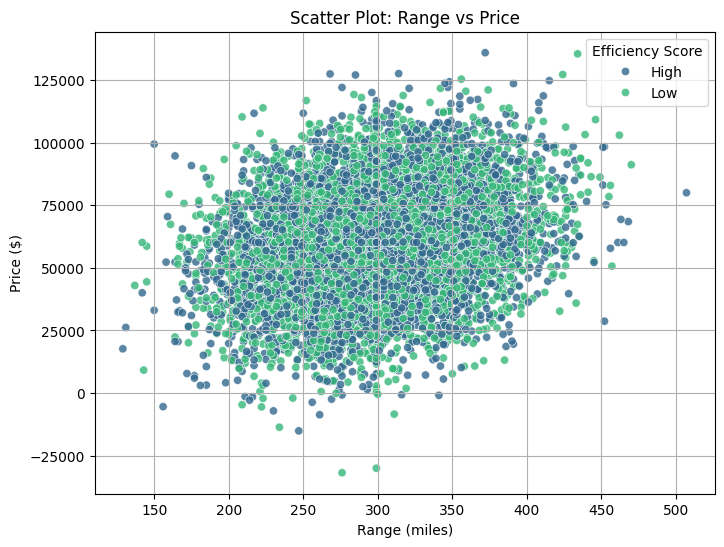

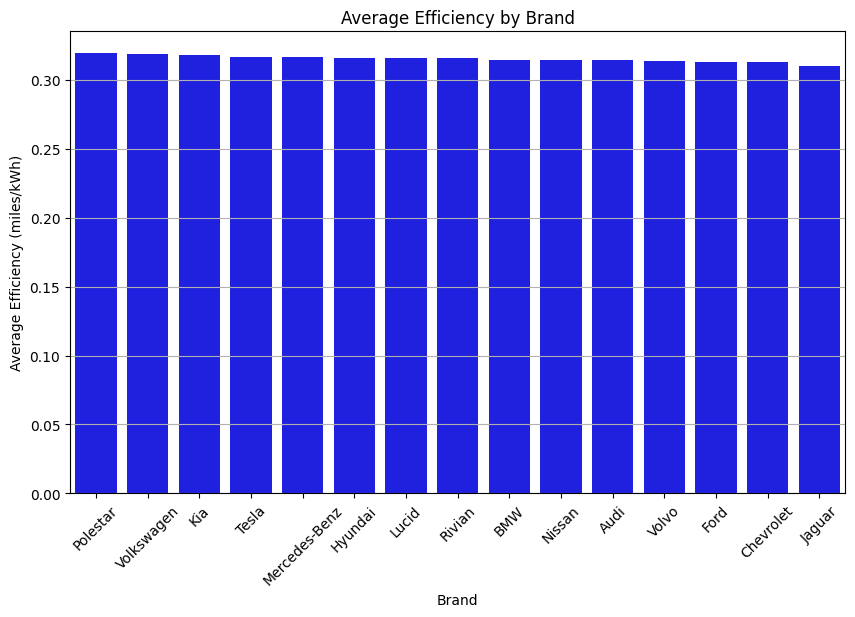

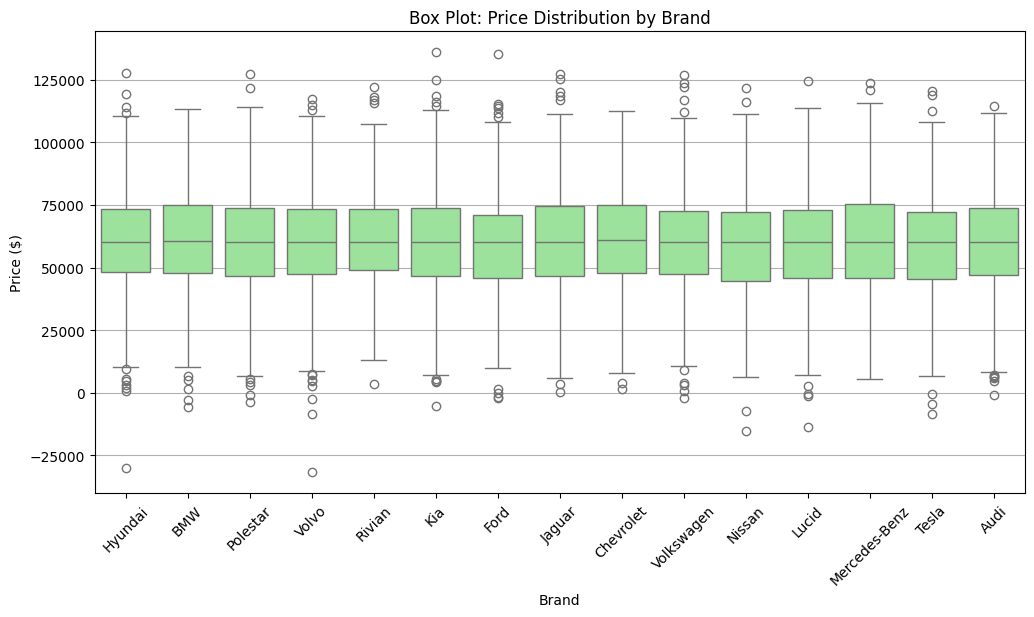

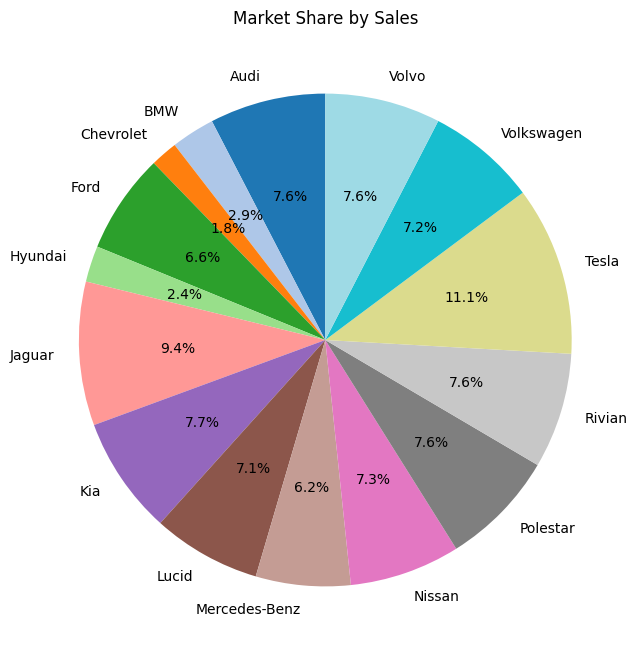

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# a) Generate descriptive statistics using `describe()`
print("Descriptive Statistics for EV Final DataFrame:")
print(ev_final_df.describe())

# b) Create visualizations:

# 1. Scatter plot of Range vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ev_final_df, x='Range', y='Price', hue='Efficiency_Score', palette='viridis', alpha=0.8)
plt.title('Scatter Plot: Range vs Price')
plt.xlabel('Range (miles)')
plt.ylabel('Price ($)')
plt.legend(title='Efficiency Score')
plt.grid(True)
plt.show()

# 2. Bar plot of average Efficiency by Brand
plt.figure(figsize=(10, 6))
avg_efficiency_by_brand = ev_final_df.groupby('Brand')['Efficiency'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_efficiency_by_brand, x='Brand', y='Efficiency', color='blue')  
plt.title('Average Efficiency by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Efficiency (miles/kWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Box plot of Price distribution by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=ev_final_df, x='Brand', y='Price', color='lightgreen')  # Removed `palette`
plt.title('Box Plot: Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4. Pie chart of market share based on Sales
plt.figure(figsize=(8, 8))
market_share_data = ev_final_df.groupby('Brand')['Sales'].sum()
market_share_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20', ylabel='')
plt.title('Market Share by Sales')
plt.show()


##  Advanced Analysis


Grouped Data (Mean Range, Price, Efficiency):
            Brand Primary_Manufacturing_Location  Mean_Range    Mean_Price  \
0            Audi                         Sweden  302.011438  60086.436165   
1             BMW                         Mexico  303.042722  61309.778474   
2       Chevrolet                         Sweden  299.996855  61352.118420   
3            Ford                          Japan  300.902711  58920.791278   
4         Hyundai                             UK  296.707937  60591.216773   
5          Jaguar                         Mexico  298.784946  61283.777273   
6             Kia                         Sweden  301.086751  60420.809393   
7           Lucid                        Germany  297.867982  59302.688564   
8   Mercedes-Benz                         Mexico  298.022617  60547.489705   
9          Nissan                    South Korea  296.986928  58512.926634   
10       Polestar                            USA  299.051754  59930.248666   
11         Rivian 

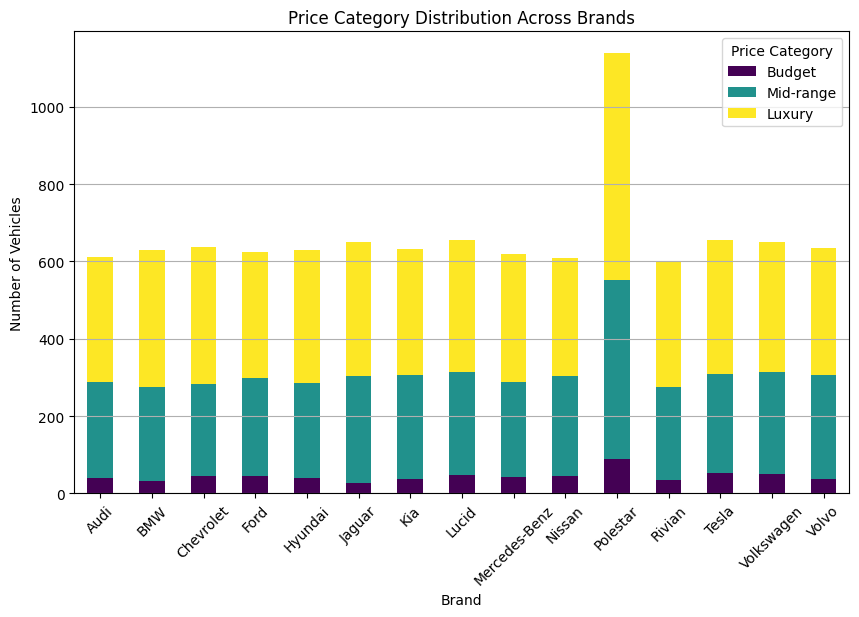


Top 5 Models Based on Value Score:
          Model  Value_Score       Brand        Price  Efficiency  Range
2714     e-tron     0.454288      Jaguar   205.067750    0.311571  299.0
414   Q4 e-tron     0.110368     Hyundai   577.024020    0.243072  262.0
6439          2     0.079801  Volkswagen   584.621198    0.211101  221.0
5145       Niro     0.077149   Chevrolet  1273.166631    0.358479  274.0
4061    Model 3     0.071194         BMW  1448.948182    0.352071  293.0

Efficiency Distribution by Brand:
Efficiency_Score  High_Percentage  Low_Percentage
Brand                                            
Audi                    52.450980       47.549020
BMW                     52.848101       47.151899
Chevrolet               50.786164       49.213836
Ford                    50.717703       49.282297
Hyundai                 53.174603       46.825397
Jaguar                  49.769585       50.230415
Kia                     56.309148       43.690852
Lucid                   53.566009       4

C:\Users\Coditas-Admin\AppData\Local\Temp\ipykernel_528\4246249383.py:60: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_analysis_df = ev_final_df.groupby(pd.Grouper(key="Launch_Date", freq="A"))["Sales"].sum()
C:\Users\Coditas-Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


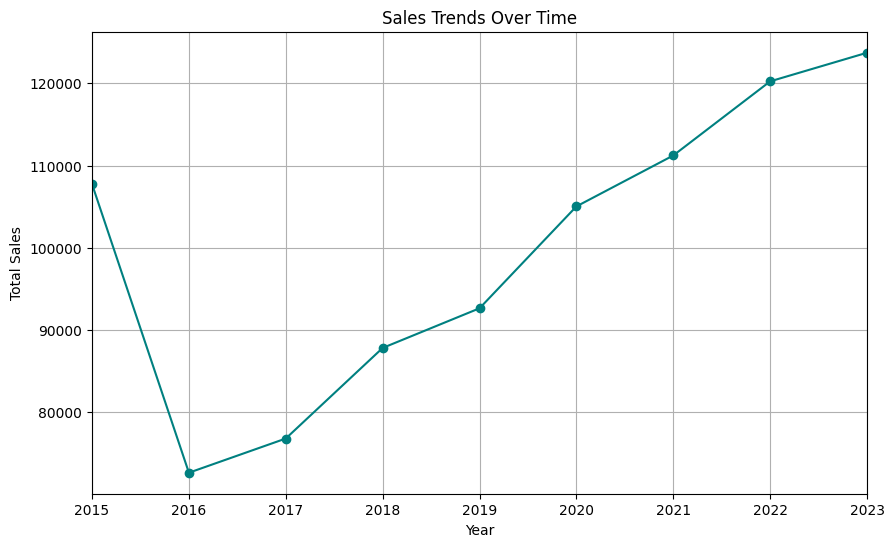

In [79]:
# a) Group the data by Brand and Manufacturing_Location, then calculate mean Range, Price, and Efficiency
grouped_data_df = (
    ev_final_df.groupby(["Brand", "Primary_Manufacturing_Location"])
    .agg(
        Mean_Range=("Range", "mean"),
        Mean_Price=("Price", "mean"),
        Mean_Efficiency=("Efficiency", "mean"),
    )
    .reset_index()
)
print("Grouped Data (Mean Range, Price, Efficiency):")
print(grouped_data_df)

# b) Bin the 'Price' into categories and analyze the distribution
price_bins = [0, 30000, 60000, np.inf]
price_labels = ["Budget", "Mid-range", "Luxury"]
ev_final_df["Price_Category"] = pd.cut(ev_final_df["Price"], bins=price_bins, labels=price_labels)

# Analyze distribution of Price_Category across Brands
price_category_distribution_df = ev_final_df.groupby(["Brand", "Price_Category"], observed=False).size().unstack(fill_value=0)
print("\nPrice Category Distribution Across Brands:")
print(price_category_distribution_df)

# Visualize Price Category Distribution
price_category_distribution_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Price Category Distribution Across Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.legend(title="Price Category")
plt.grid(axis="y")
plt.show()

# c) Identify the top 5 models based on the 'Value_Score'
top_5_models_df = ev_final_df.nlargest(5, "Value_Score")[["Model", "Value_Score", "Brand", "Price", "Efficiency", "Range"]]
print("\nTop 5 Models Based on Value Score:")
print(top_5_models_df)

# d) Calculate the percentage of High vs Low efficiency vehicles for each Brand
efficiency_distribution_df = (
    ev_final_df.groupby(["Brand", "Efficiency_Score"], observed=False).size().unstack(fill_value=0)
)
efficiency_distribution_df["Total"] = efficiency_distribution_df.sum(axis=1)
efficiency_distribution_df["High_Percentage"] = (
    efficiency_distribution_df["High"] / efficiency_distribution_df["Total"] * 100
)
efficiency_distribution_df["Low_Percentage"] = (
    efficiency_distribution_df["Low"] / efficiency_distribution_df["Total"] * 100
)
print("\nEfficiency Distribution by Brand:")
print(efficiency_distribution_df[["High_Percentage", "Low_Percentage"]])

# e) Perform a time-based analysis
# If no Launch_Date column, create a hypothetical one
if "Launch_Date" not in ev_final_df.columns:
    np.random.seed(42)  # For reproducibility
    ev_final_df["Launch_Date"] = pd.date_range(start="2015-01-01", periods=len(ev_final_df), freq="M")

# Analyze trends over time (e.g., Sales over Launch_Date)
time_analysis_df = ev_final_df.groupby(pd.Grouper(key="Launch_Date", freq="A"))["Sales"].sum()
print("\nSales Trends Over Time:")
print(time_analysis_df)

# Visualize Sales Trends Over Time
time_analysis_df.plot(kind="line", marker="o", figsize=(10, 6), color="teal")
plt.title("Sales Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## Other Analysis

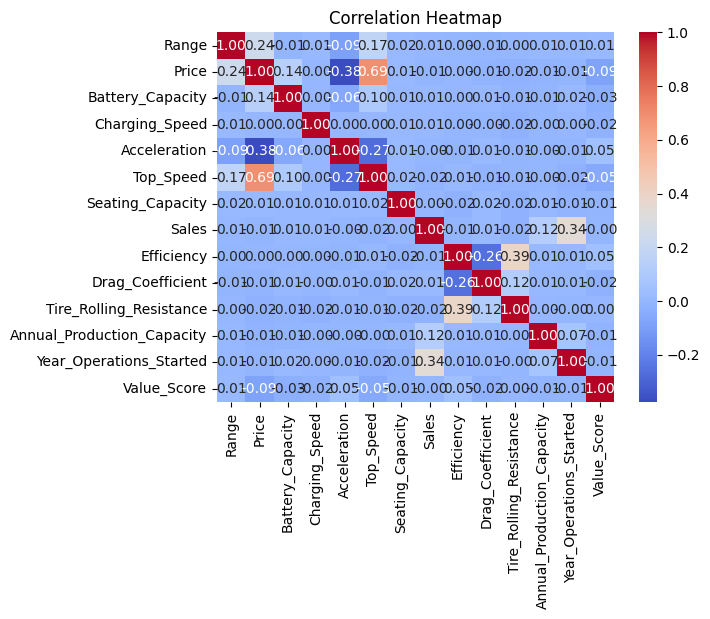

In [80]:
# Correlation Analysis:
# Drop non-numeric columns if needed
ev_final_numeric_df = ev_final_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix_df = ev_final_numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


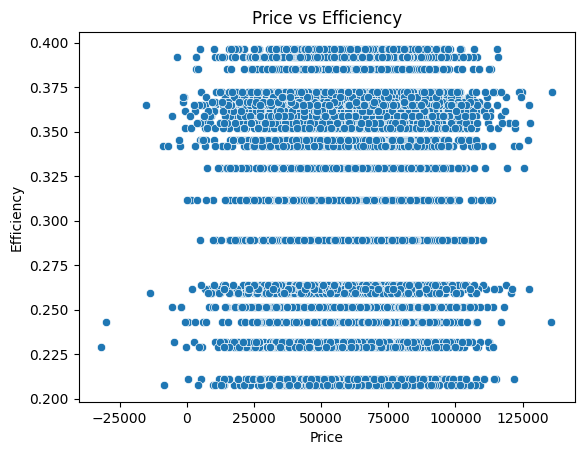

In [37]:
## Price vs. Efficiency Trade-off

sns.scatterplot(x="Price", y="Efficiency", data=ev_final)
plt.title("Price vs Efficiency")
plt.xlabel("Price")
plt.ylabel("Efficiency")
plt.show()


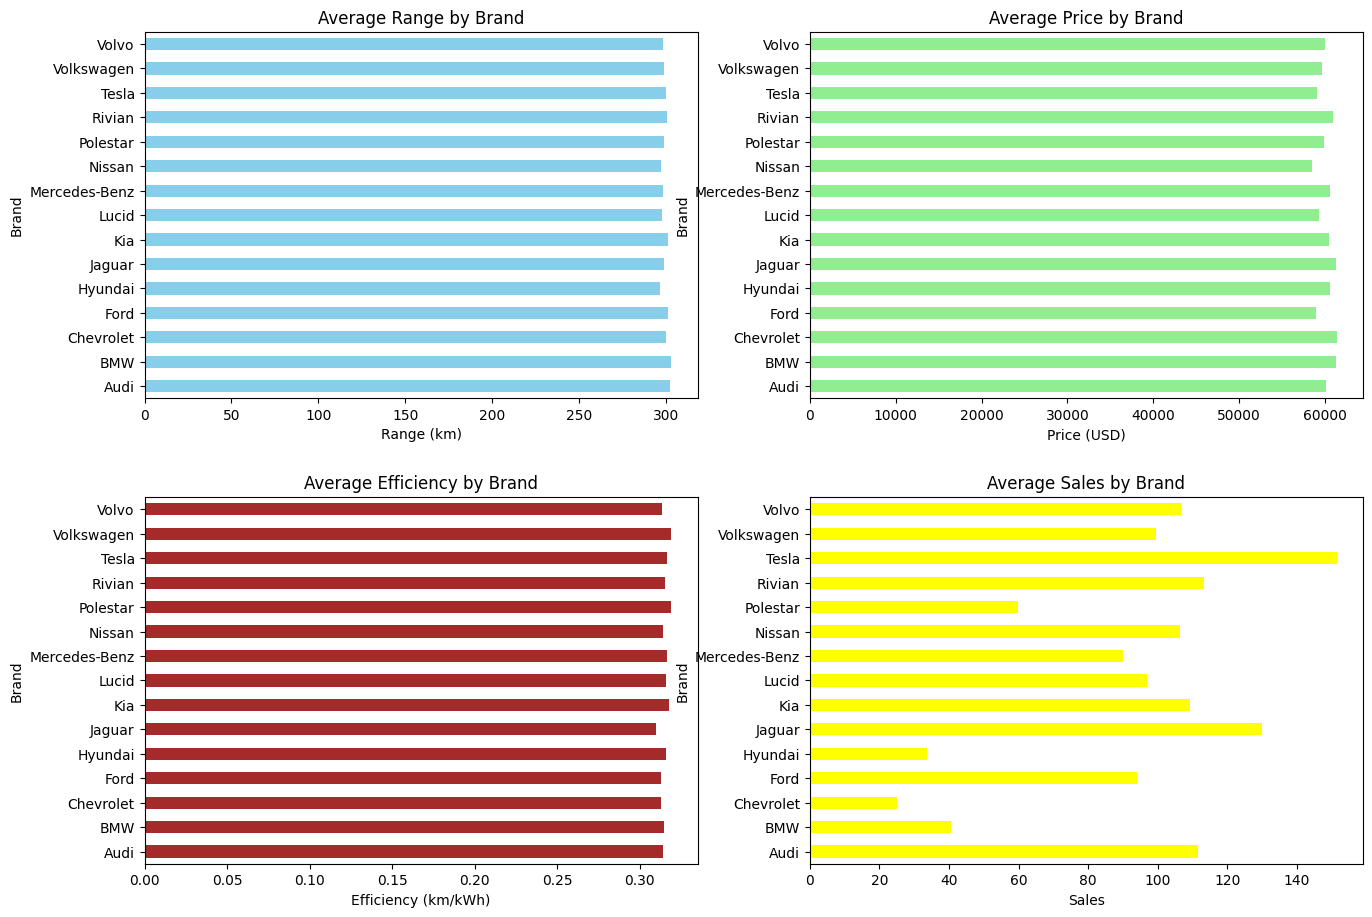

In [81]:
# Brand-wise Performance Analysis
brand_performance_df = ev_final_df.groupby("Brand")[["Range", "Price", "Efficiency", "Sales"]].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
fig.tight_layout(pad=5.0)  

# Plot Range
brand_performance_df["Range"].plot(kind="barh", ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Average Range by Brand")
axes[0, 0].set_xlabel("Range (km)")
axes[0, 0].set_ylabel("Brand")

# Plot Price
brand_performance_df["Price"].plot(kind="barh", ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Average Price by Brand")
axes[0, 1].set_xlabel("Price (USD)")
axes[0, 1].set_ylabel("Brand")

# Plot Efficiency
brand_performance_df["Efficiency"].plot(kind="barh", ax=axes[1, 0], color='brown')
axes[1, 0].set_title("Average Efficiency by Brand")
axes[1, 0].set_xlabel("Efficiency (km/kWh)")
axes[1, 0].set_ylabel("Brand")

# Plot Sales
brand_performance_df["Sales"].plot(kind="barh", ax=axes[1, 1], color='yellow')
axes[1, 1].set_title("Average Sales by Brand")
axes[1, 1].set_xlabel("Sales")
axes[1, 1].set_ylabel("Brand")

# Show the plot
plt.show()


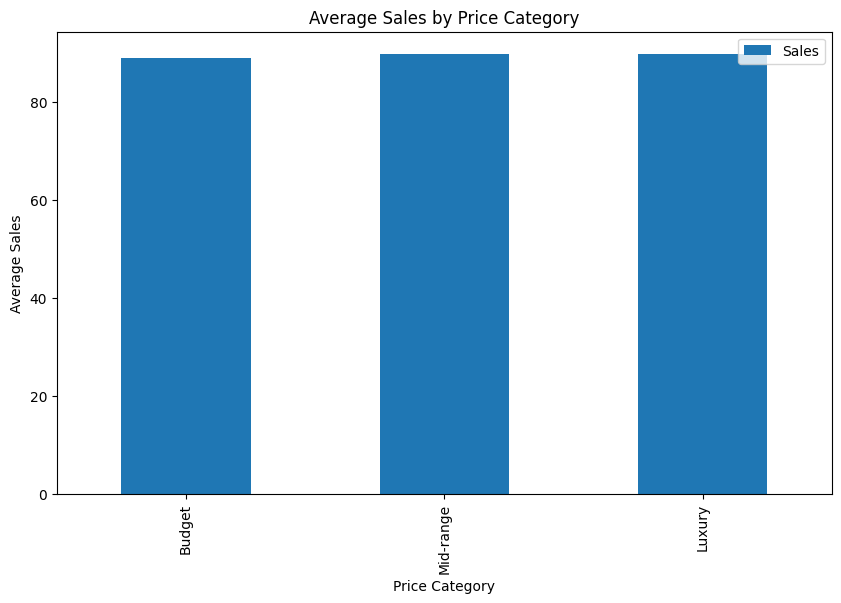

In [82]:
# Price Sensitivity Analysis
price_sales_analysis_df = ev_final_df.groupby("Price_Category", observed=True)[["Sales"]].mean()

# Plot the analysis
price_sales_analysis_df.plot(kind="bar", figsize=(10, 6))
plt.title("Average Sales by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Average Sales")
plt.show()


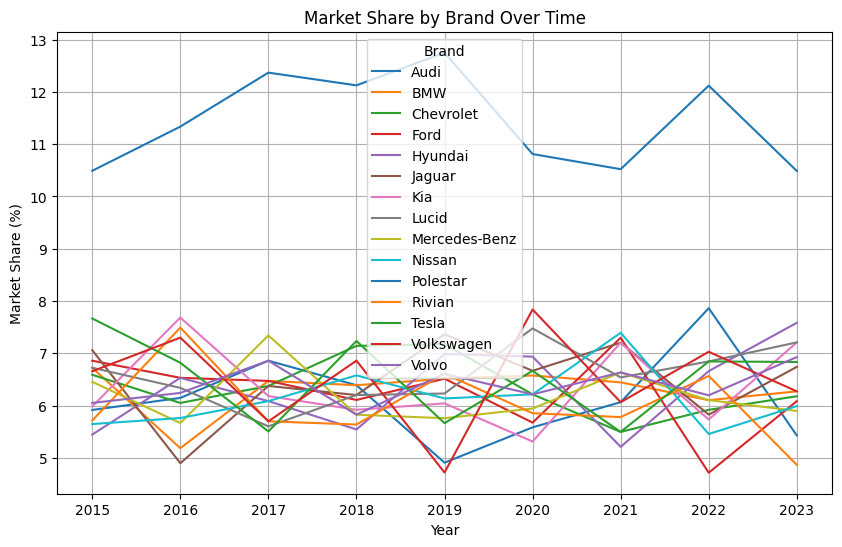

In [83]:
# Ensure 'Launch_Date' is in datetime format
ev_final_df['Launch_Date'] = pd.to_datetime(ev_final_df['Launch_Date'], errors='coerce')

# Market Share Trends by Brand
market_share_by_brand_df = ev_final_df.groupby([ev_final_df['Launch_Date'].dt.year, 'Brand']).size().unstack(fill_value=0)

# Calculate market share as a percentage of total vehicles per year
market_share_by_brand_df = market_share_by_brand_df.div(market_share_by_brand_df.sum(axis=1), axis=0) * 100

# Plot the market share trends by brand over time
market_share_by_brand_df.plot(kind="line", figsize=(10, 6))
plt.title("Market Share by Brand Over Time")
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.grid(True)
plt.show()


### Sales Contribution by Primary Manufacturing Location for Each Brand ###
            Brand Primary_Manufacturing_Location    Sales
0            Audi                         Sweden  68323.0
1             BMW                         Mexico  25699.0
2       Chevrolet                         Sweden  16023.0
3            Ford                          Japan  58901.0
4         Hyundai                             UK  21287.0
5          Jaguar                         Mexico  84627.0
6             Kia                         Sweden  69302.0
7           Lucid                        Germany  63918.0
8   Mercedes-Benz                         Mexico  55779.0
9          Nissan                    South Korea  65187.0
10       Polestar                            USA  68345.0
11         Rivian                             UK  68035.0
12          Tesla                         Mexico  99633.0
13     Volkswagen                             UK  64815.0
14          Volvo                    South Korea  6805

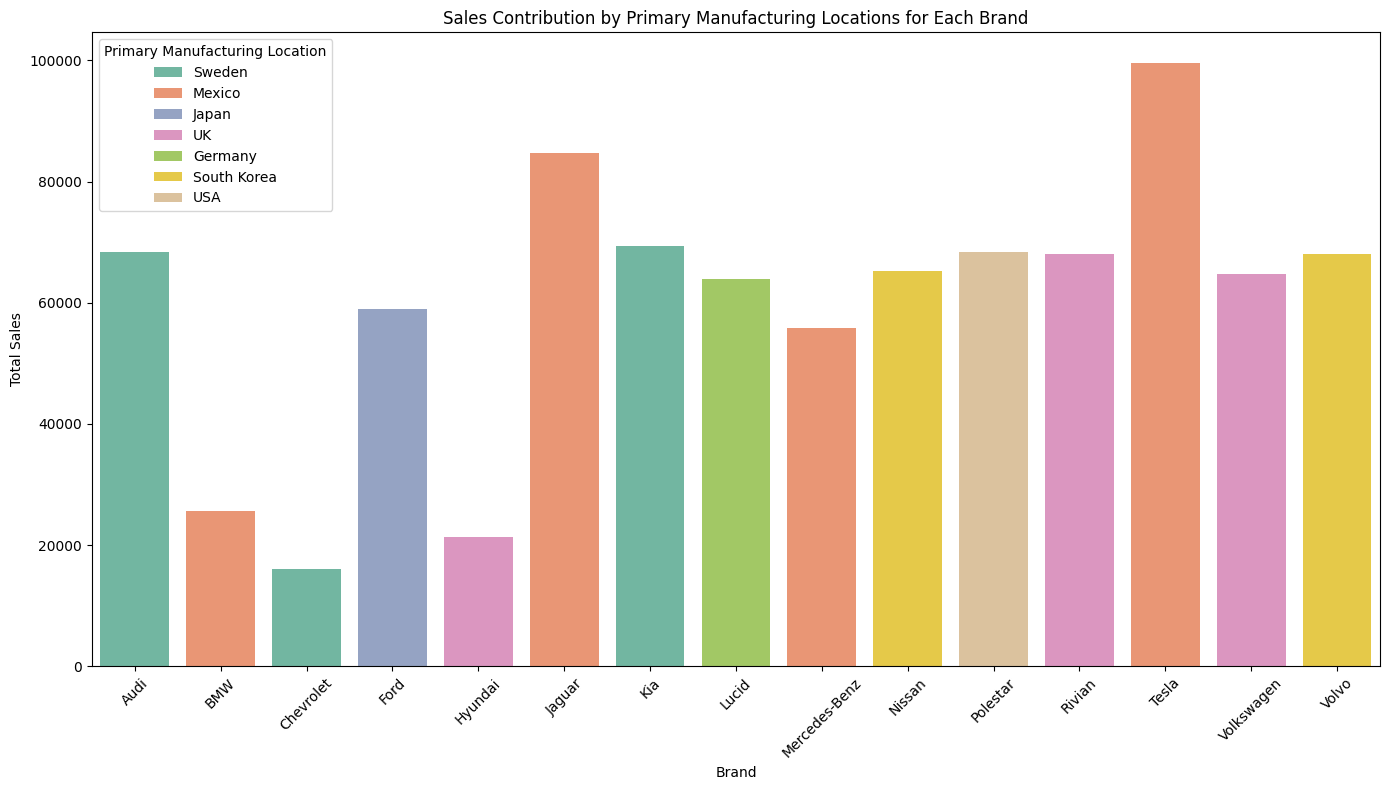


### Sales Contribution by Secondary Manufacturing Location for Each Brand ###
            Brand Secondary_Manufacturing_Location    Sales
0            Audi                            China  68323.0
1             BMW                           Sweden  25699.0
2       Chevrolet                            China  16023.0
3            Ford                           Sweden  58901.0
4         Hyundai                           Sweden  21287.0
5          Jaguar                            Japan  84627.0
6             Kia                           Sweden  69302.0
7           Lucid                              USA  63918.0
8   Mercedes-Benz                           Sweden  55779.0
9          Nissan                            China  65187.0
10       Polestar                           Sweden  68345.0
11         Rivian                               UK  68035.0
12          Tesla                          Germany  99633.0
13     Volkswagen                               UK  64815.0
14          Volvo    

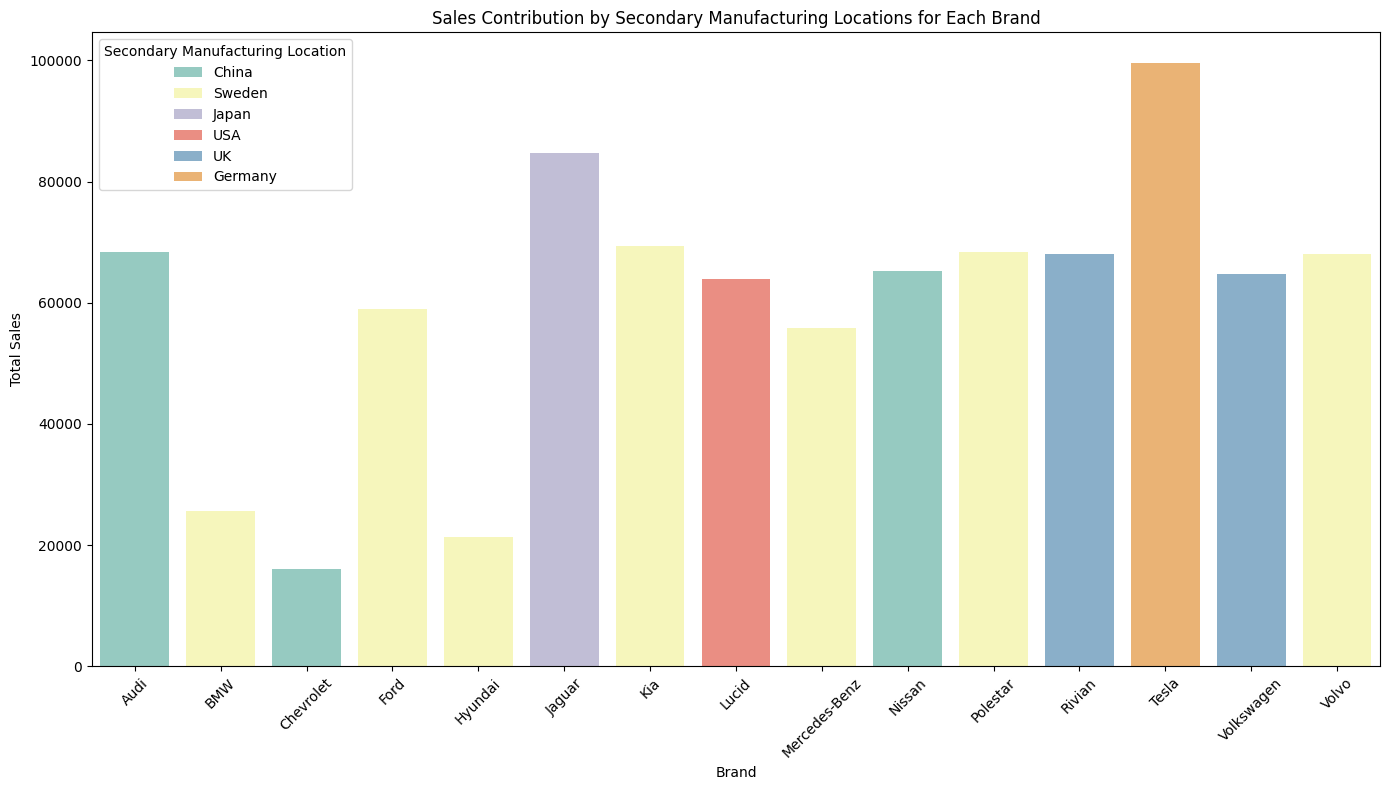

In [84]:
# Sales Contribution for Primary Manufacturing Locations
primary_location_sales_df = (
    ev_final_df.groupby(["Brand", "Primary_Manufacturing_Location"])["Sales"]
    .sum()
    .reset_index()
    .sort_values(by=["Brand", "Sales"], ascending=[True, False])
)

# Displaying the primary location sales
print("### Sales Contribution by Primary Manufacturing Location for Each Brand ###")
print(primary_location_sales_df)

# Visualization: Barplot for Primary Manufacturing Location Sales
plt.figure(figsize=(14, 8))
sns.barplot(
    data=primary_location_sales_df,
    x="Brand",
    y="Sales",
    hue="Primary_Manufacturing_Location",
    palette="Set2",
)
plt.title("Sales Contribution by Primary Manufacturing Locations for Each Brand")
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Primary Manufacturing Location")
plt.tight_layout()
plt.show()

# Sales Contribution for Secondary Manufacturing Locations
secondary_location_sales_df = (
    ev_final_df.groupby(["Brand", "Secondary_Manufacturing_Location"])["Sales"]
    .sum()
    .reset_index()
    .sort_values(by=["Brand", "Sales"], ascending=[True, False])
)

# Displaying the secondary location sales
print("\n### Sales Contribution by Secondary Manufacturing Location for Each Brand ###")
print(secondary_location_sales_df)

# Visualization: Barplot for Secondary Manufacturing Location Sales
plt.figure(figsize=(14, 8))
sns.barplot(
    data=secondary_location_sales_df,
    x="Brand",
    y="Sales",
    hue="Secondary_Manufacturing_Location",
    palette="Set3",
)
plt.title("Sales Contribution by Secondary Manufacturing Locations for Each Brand")
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Secondary Manufacturing Location")
plt.tight_layout()
plt.show()


In [50]:
# Printing each brand and its corresponding name length
for brand in ev_final['Brand'].unique():
    print(f"Brand: {brand}, Length: {len(brand)}")


Brand: Hyundai, Length: 7
Brand: BMW, Length: 3
Brand: Polestar, Length: 8
Brand: Volvo, Length: 5
Brand: Rivian, Length: 6
Brand: Kia, Length: 3
Brand: Ford, Length: 4
Brand: Jaguar, Length: 6
Brand: Chevrolet, Length: 9
Brand: Volkswagen, Length: 10
Brand: Nissan, Length: 6
Brand: Lucid, Length: 5
Brand: Mercedes-Benz, Length: 13
Brand: Tesla, Length: 5
Brand: Audi, Length: 4
